# 1. Importing Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Data Import & Preview

In [3]:
df= pd.read_csv('salary_data.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# 3. Data Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


### 3.1 So there are 5 categorical columns & 3 numerical columns as specified by the datatype

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6702.0,33.620859,7.614633,21.0,28.0,32.0,38.0,62.0
Years of Experience,6701.0,8.094687,6.059003,0.0,3.0,7.0,12.0,34.0
Salary,6699.0,115326.964771,52786.183911,350.0,70000.0,115000.0,160000.0,250000.0


In [7]:
print('Total Rows  : ',df.shape[0] , '\nTotal Columns : ',df.shape[1])

Total Rows  :  6704 
Total Columns :  8


### 3.2 We got the statistics of the numerical columns as well as the shape/size of dataset.

# 4. Data Cleaning

### 4.1 Checking for missing values & dealing with them accordingly

In [8]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64


In [9]:
print('The missing values in Age column contributes: {}'.format(round((5/6704) * 100,3))+ '%')

The missing values in Age column contributes: 0.075%


In [10]:
print('The % of missing values is very less, so we can drop these rows as they will not effect the dataset')

The % of missing values is very less, so we can drop these rows as they will not effect the dataset


### 4.2 Making a generalised function to check for missing values

In [11]:
# Creating a list of columns in the dataset
dataset_columns= list(df.columns)

# Creating a list to store the null value count for each column
null_values=[]
for i in dataset_columns:
    if df[i].isnull().sum() > 0:
        null_values.append(df[i].isnull().sum())
    else:
        null_values.append(0)
        
# making a key-value pair in a dictionary for column names and the missing values
new_dict = dict(zip(dataset_columns,null_values))

#Traversing the dictionary to get the missing values and their percentage
for x,y in new_dict.items():
    if y>0:
        print('The missing values in',x, 'column contributes: {}'.format(round((y/6704) * 100,3))+ '% to data \n')
    else:
        print("No missing values in ",x,'column')

The missing values in Age column contributes: 0.03% to data 

The missing values in Gender column contributes: 0.03% to data 

The missing values in Education Level column contributes: 0.045% to data 

The missing values in Job Title column contributes: 0.03% to data 

The missing values in Years of Experience column contributes: 0.045% to data 

The missing values in Salary column contributes: 0.075% to data 

No missing values in  Country column
No missing values in  Race column


### As the percentage of missing values is very less , dropping these rows won't affect the dataset. Therefore, we can drop these empty rows

In [12]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

# 5 Exploratory Data Analysis (EDA)

### 5.1 Let's start by exploring the distribution of salary range in the dataset

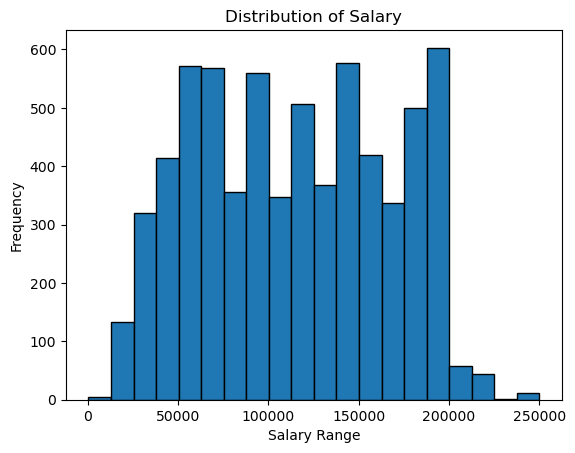

In [15]:
plt.hist(df['Salary'], bins=20, edgecolor='black')
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title("Distribution of Salary")
plt.show()

### 5.2 Relationship between Age & Salary of a person

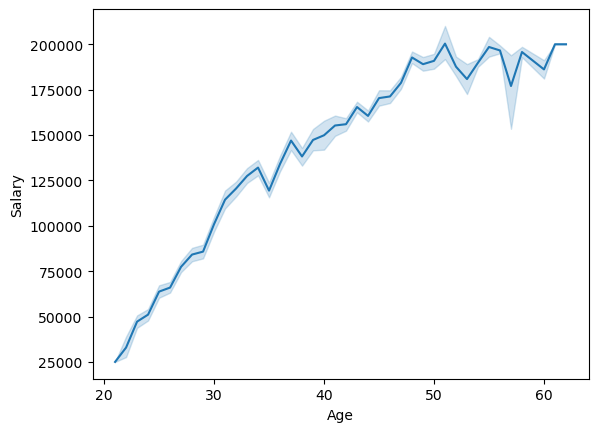

In [16]:
sb.lineplot(data = df, x= 'Age', y = 'Salary');

### 5.3 Salary distribution across the Age Range derived from Age column

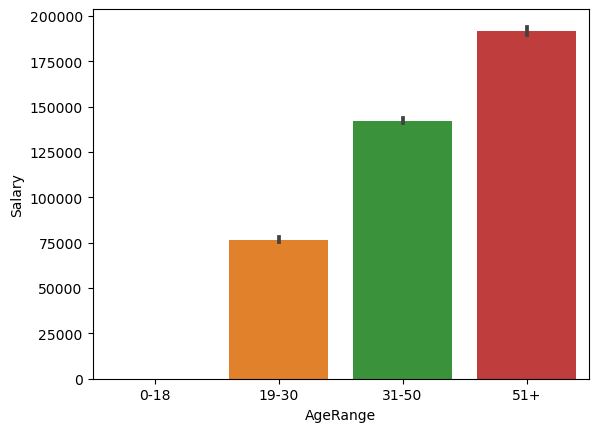

In [17]:
bins = [0, 18, 30, 50, float('inf')]  # Define your age range bins
labels = ['0-18', '19-30', '31-50', '51+']  # Labels for the age ranges

# Create the 'AgeRange' column using pd.cut()
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels)

sb.barplot(data = df , x= 'AgeRange' , y='Salary');

### 5.4 Relationship of Gender and Salary

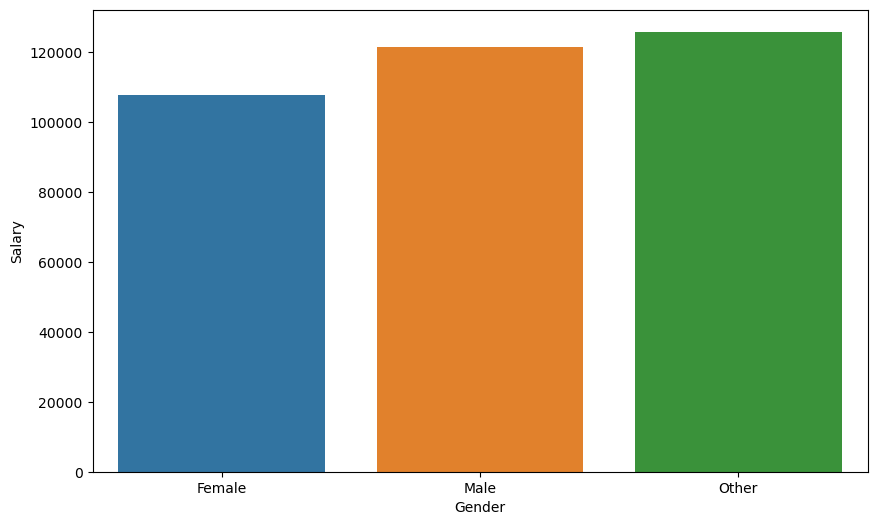

In [18]:
gender_salary = df.groupby('Gender')[['Salary']].mean()

plt.figure(figsize = (10,6))
sb.barplot(data= gender_salary, x=gender_salary.index, y = 'Salary');

### 5.5 Relationship of Education Level and Salary

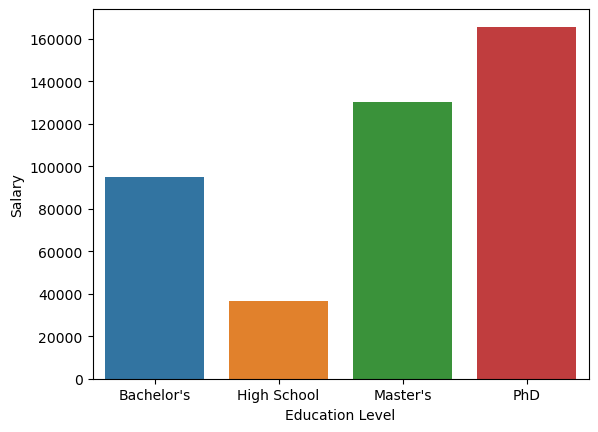

In [19]:
df['Education Level'] = df['Education Level'].replace({"Bachelor's Degree":"Bachelor's","Master's Degree":"Master's",'phD':'PhD'})
salary_education = df.groupby('Education Level')[['Salary']].mean().sort_index()
sb.barplot(data= salary_education,x = salary_education.index, y = 'Salary');

### 5.6 let's explore the role of Gender in Education level and their salaries

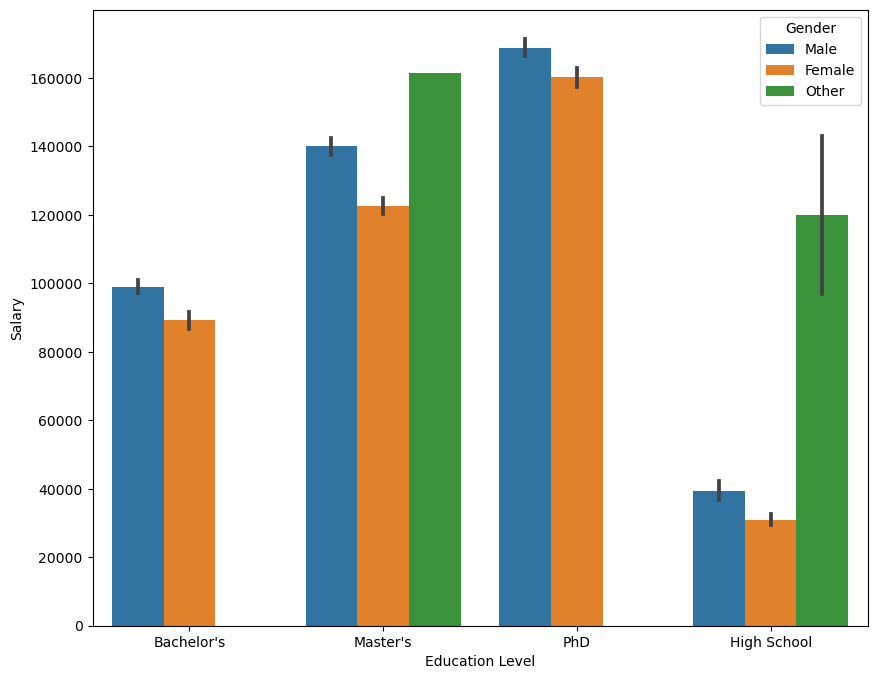

In [20]:
plt.figure(figsize=(10,8))
sb.barplot(data= df,x = df['Education Level'], y = df['Salary'], hue= 'Gender');

### 5.7 Let's find the top 10 highest paying job titles

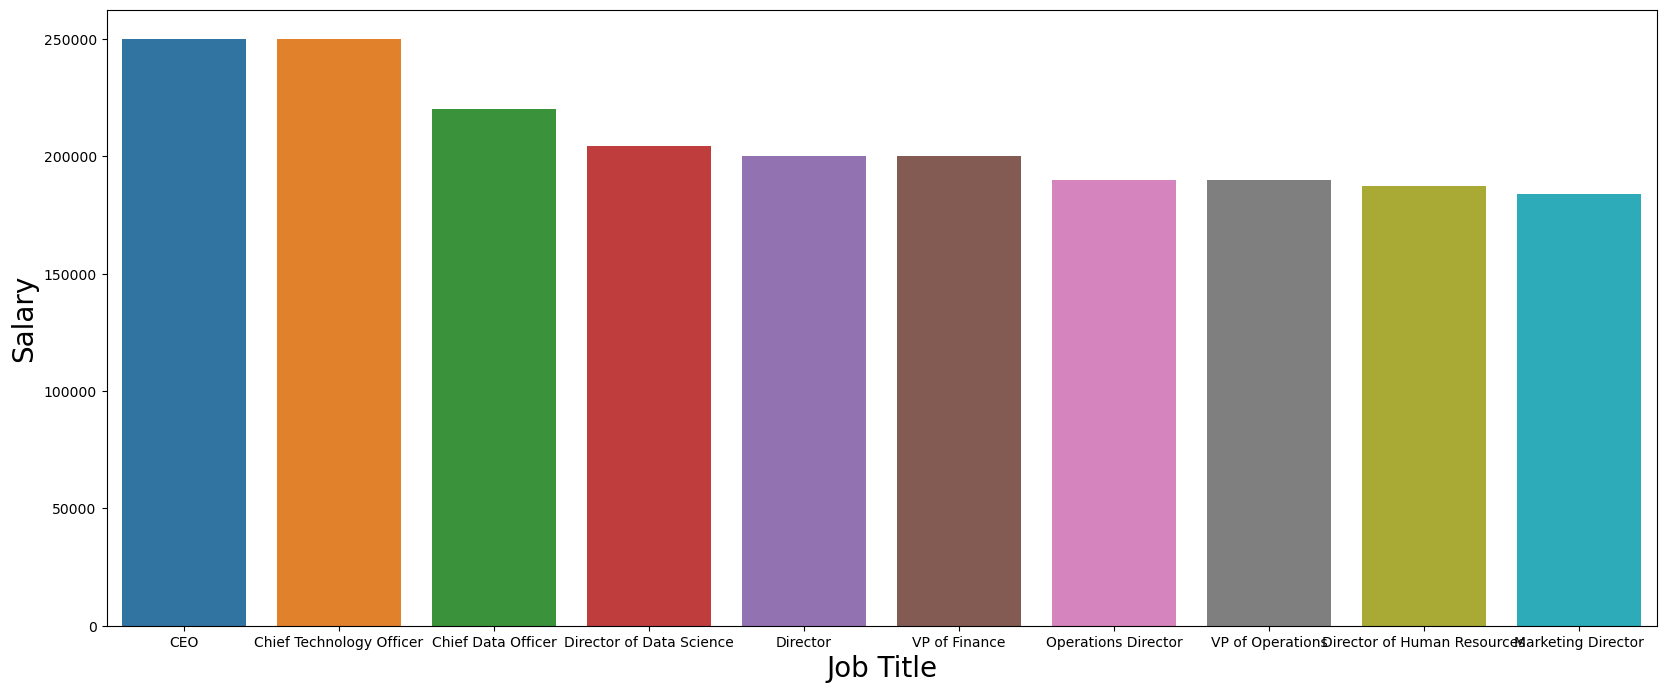

In [21]:
#Data derivation
job_salary = df.groupby('Job Title')[['Salary']].mean().sort_index()
top_10_highest_paying_job_title = job_salary.nlargest(10,'Salary')

#PLotting
plt.figure(figsize = (20,8))
sb.barplot( data = top_10_highest_paying_job_title, x = top_10_highest_paying_job_title.index, y= 'Salary')
plt.xlabel('Job Title',size =20)
plt.ylabel('Salary',size =20)

plt.show()

### 5.8 let's find the bottom 10 least paying job titles

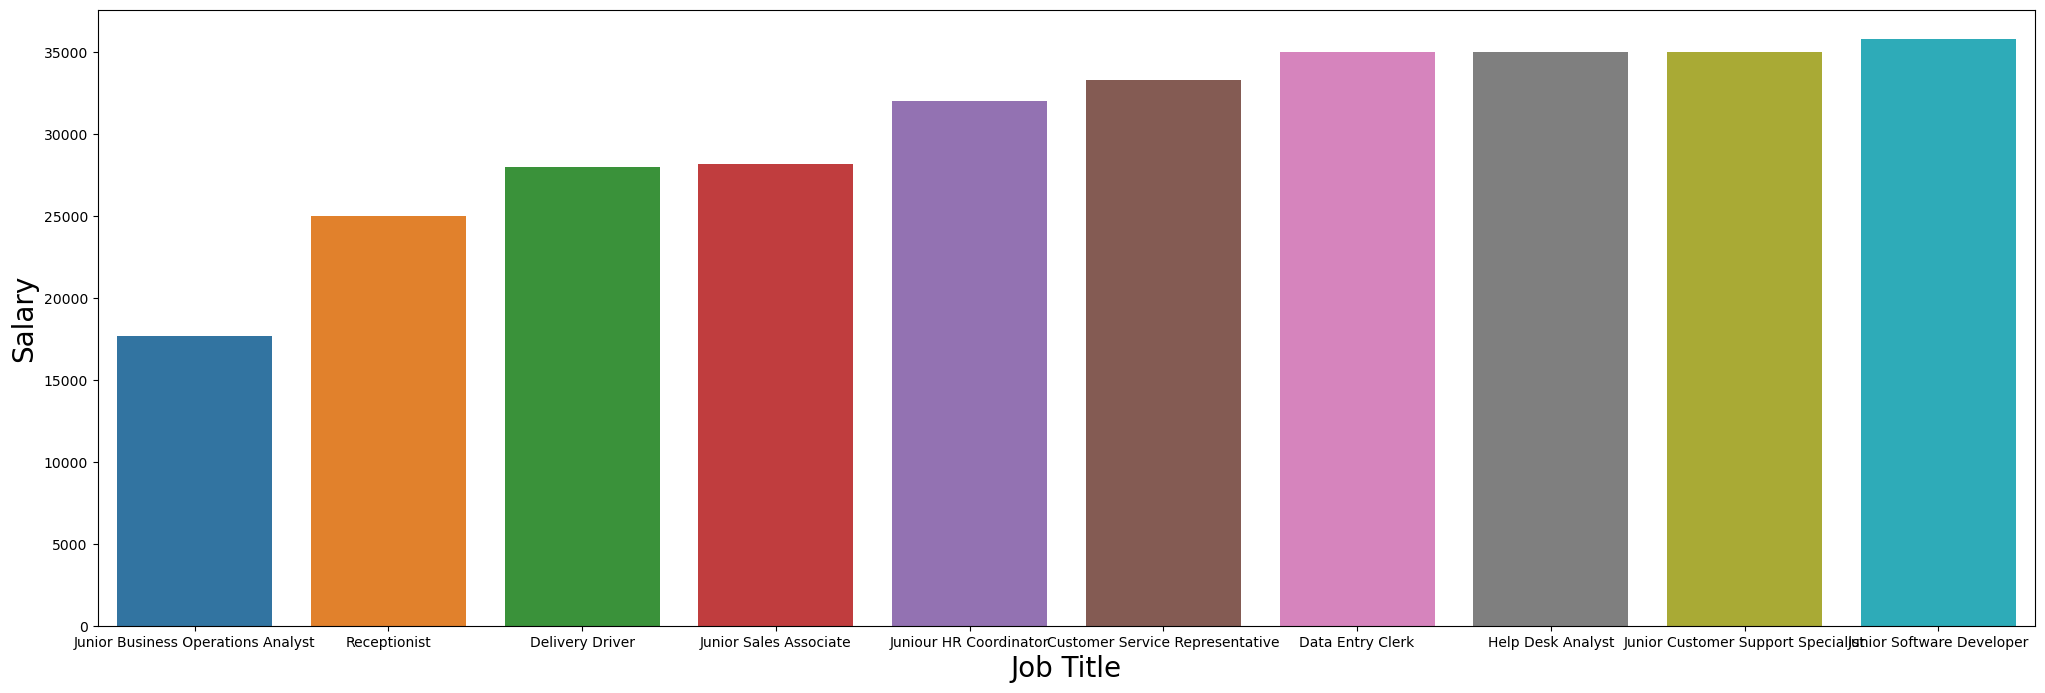

In [22]:
bottom_10_job_titles = job_salary.nsmallest(10, 'Salary')
plt.figure(figsize = (25,8))
sb.barplot(data = bottom_10_job_titles, x= bottom_10_job_titles.index, y= 'Salary')
plt.xlabel('Job Title',size =20)
plt.ylabel('Salary',size =20)
plt.show()

### 5.9 let' see which country is earning more salary 

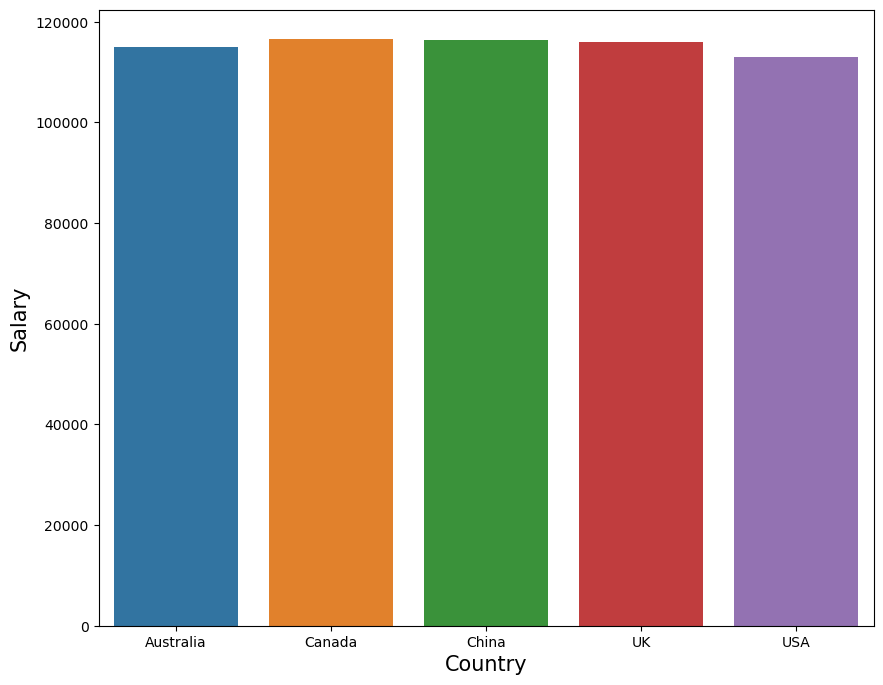

In [23]:
country_salary = df.groupby('Country')[['Salary']].mean().sort_index()

plt.figure(figsize = (10,8))
sb.barplot(data = country_salary, x= country_salary.index, y= 'Salary')
plt.xlabel('Country',size =15)
plt.ylabel('Salary',size =15)
plt.show()

### 5.10 Relation between the race and salary

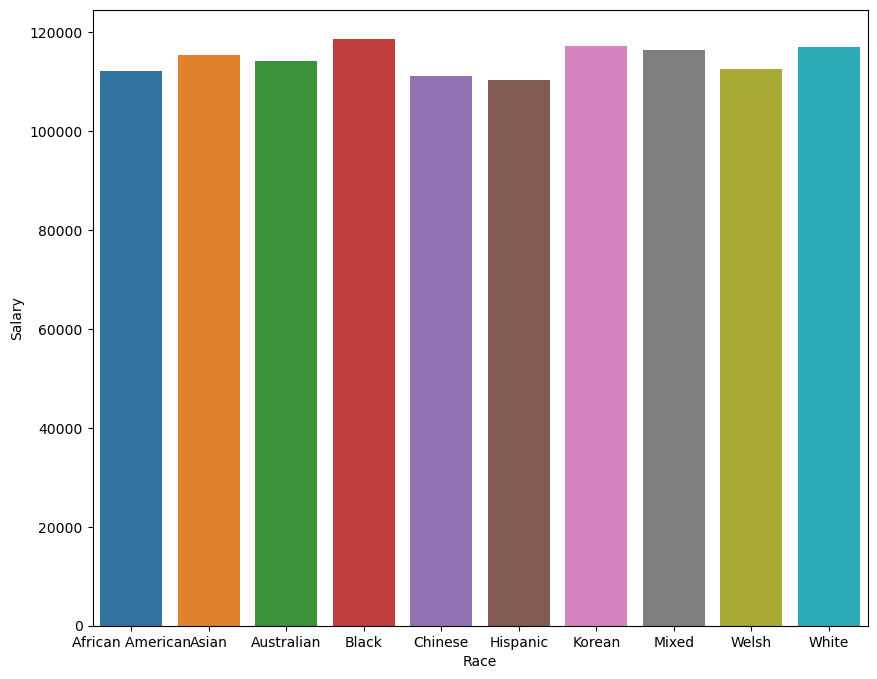

In [24]:
race_salary = df.groupby('Race')[['Salary']].mean()

plt.figure(figsize = (10,8))
sb.barplot(data  = race_salary , x =race_salary.index , y= 'Salary');

### 5.11 Relation between salary & years of expereince

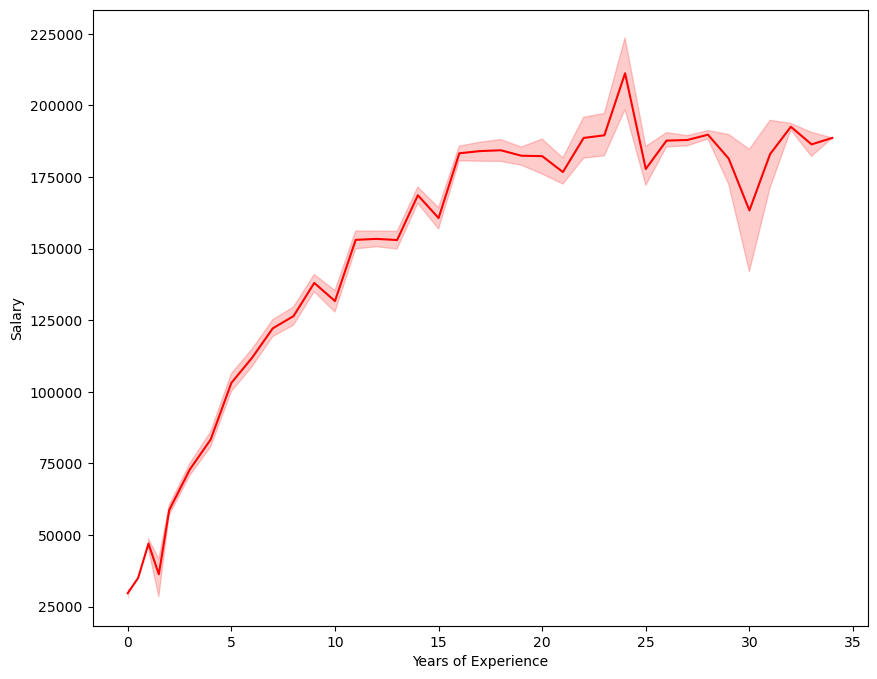

In [25]:
plt.figure(figsize=(10,8))
sb.lineplot(data= df , x= df['Years of Experience'] ,y =df['Salary'], color = 'red');

### 5.12 Let's find the top 5 highest paying job titles and their Gender distribution

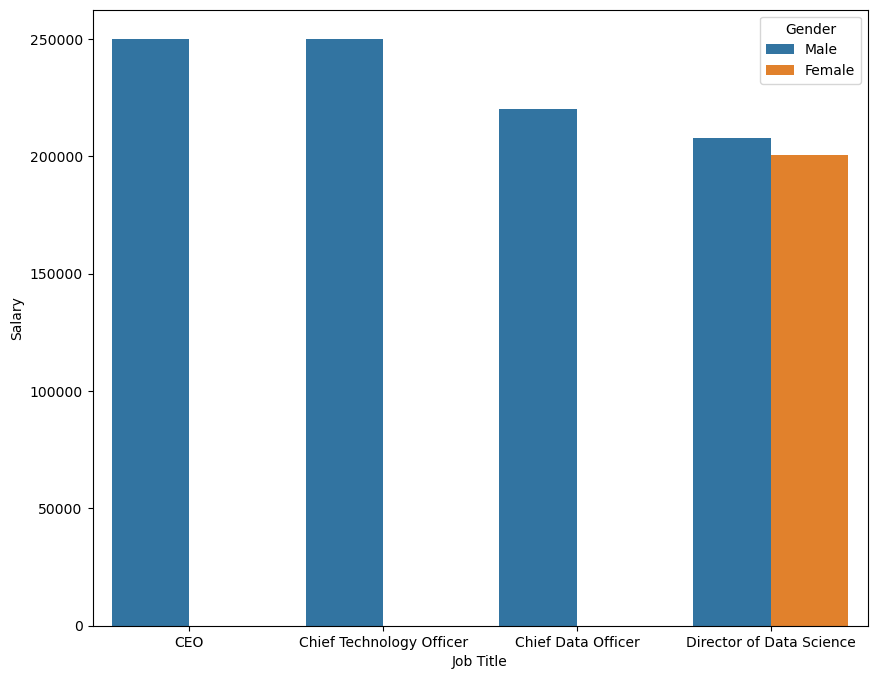

In [26]:
job_titles_salary = df.groupby(['Job Title','Gender'])[['Salary']].mean().reset_index()
top_5 = job_titles_salary.nlargest(5,'Salary').reset_index(drop=True)

plt.figure(figsize=(10,8))
sb.barplot(data = top_5 , x= 'Job Title', y= 'Salary',hue='Gender');

### 5.13 Relationship between Race and Salary with respect to Education Level

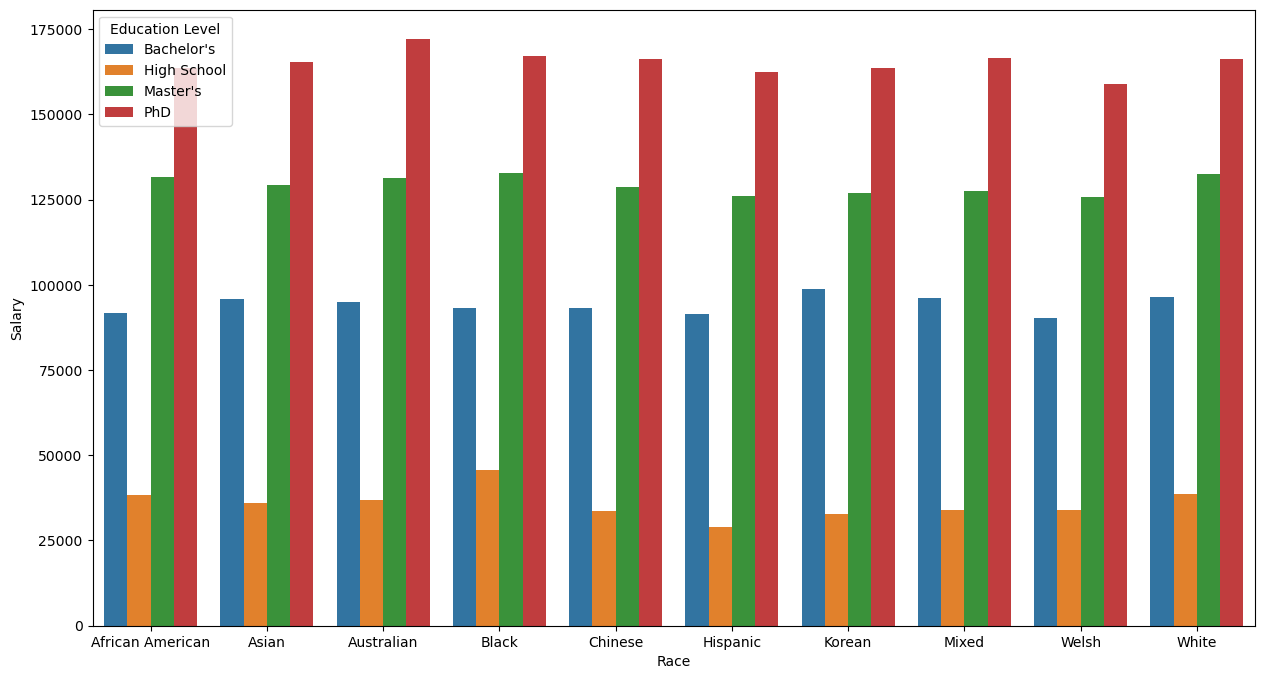

In [27]:
education_gender= df.groupby(['Education Level','Race'])[['Salary']].mean().reset_index()

plt.figure(figsize=(15,8))
sb.barplot(data = education_gender, x='Race', y='Salary',hue ='Education Level');

# 6. Dataset Preparation

In [28]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,AgeRange
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,31-50
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,19-30
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,31-50
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,31-50
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian,51+


In [29]:
df = df.drop('AgeRange',axis=1)

In [30]:
X = df.drop(columns = ['Salary'])
Y = df['Salary']

### 6.1 Splitting the dataset into Train & Test data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,random_state = 2,test_size=0.3)

### 6.2 Dealing with the categorical values in the dataframe using OneHot Encoder

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [33]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
1935,33.0,Female,Bachelor's,Full Stack Engineer,7.0,Canada,Asian
499,33.0,Male,PhD,Data Scientist,8.0,UK,Mixed
851,27.0,Male,Bachelor's,Software Engineer,4.0,USA,African American
6054,36.0,Female,PhD,Research Scientist,13.0,Australia,White
4733,35.0,Male,PhD,Senior Research Scientist,10.0,UK,White
...,...,...,...,...,...,...,...
6448,35.0,Female,PhD,Senior Product Marketing Manager,9.0,UK,Welsh
3610,27.0,Female,High School,Junior HR Generalist,1.0,USA,Asian
5709,36.0,Female,PhD,Research Scientist,12.0,Australia,Asian
6643,49.0,Female,PhD,Director of Marketing,20.0,Canada,Black


In [34]:
X_test

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
5879,28.0,Female,Bachelor's,Marketing Coordinator,3.0,UK,Asian
275,38.0,Female,Bachelor's,Senior Project Manager,9.0,UK,Asian
3322,25.0,Female,Master's,Software Engineer,2.0,Canada,Black
1762,35.0,Male,Bachelor's,Back end Developer,8.0,USA,African American
1567,43.0,Male,PhD,Senior Project Engineer,13.0,China,White
...,...,...,...,...,...,...,...
2119,36.0,Male,Bachelor's,Software Engineer Manager,8.0,USA,African American
638,28.0,Male,Bachelor's,Software Engineer,5.0,Canada,Black
2074,30.0,Female,Master's,Front end Developer,5.0,China,White
5618,30.0,Female,Bachelor's,Marketing Coordinator,5.0,Canada,Asian


### 6.3 Encoding the categorical values in Training Dataset.

In [35]:
X_train_cat_encoded = encoder.fit_transform(X_train[['Gender','Job Title','Education Level','Country','Race']])
X_train_encoded_df = pd.DataFrame(X_train_cat_encoded.toarray(),columns=encoder.get_feature_names_out(['Gender','Job Title','Education Level','Country','Race']))
X_train_encoded_df

,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Intelligence Analyst,Job Title_Chief Data Officer,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4685,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.4 As a new dataframe is created, the index of rows has been changed. In order to keep the integrity of rows let's match the index to the original dataframe.

In [36]:
X_train_encoded_df.index = X_train.index

In [37]:
X_train_encoded_df

,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Intelligence Analyst,Job Title_Chief Data Officer,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
1935,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
851,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6054,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4733,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.5 As the categorial columns are dealth with, let's append the numerical columns to get a final dataframe

In [38]:
selected_columns_df = X_train[['Age','Years of Experience']]

In [39]:
selected_columns_df

,Age,Years of Experience
1935,33.0,7.0
499,33.0,8.0
851,27.0,4.0
6054,36.0,13.0
4733,35.0,10.0
...,...,...
6448,35.0,9.0
3610,27.0,1.0
5709,36.0,12.0
6643,49.0,20.0


In [40]:
X_train_df = pd.concat([selected_columns_df,X_train_encoded_df], axis=1)

In [41]:
X_train_df

,Age,Years of Experience,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
1935,33.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,33.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
851,27.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6054,36.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4733,35.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,35.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3610,27.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5709,36.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6643,49.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.6 Repeating the same encoding steps for Test data too. Keep in mind the test data is only transformed by the encoder instead of "fit_transform". 

In [42]:
X_test_cat_encoded = encoder.transform(X_test[['Gender','Job Title','Education Level','Country','Race']])
X_test_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(),columns=encoder.get_feature_names_out(['Gender','Job Title','Education Level','Country','Race']))
X_test_encoded_df.index = X_test.index
test_selected_columns_df = X_test[['Age','Years of Experience']]
X_test_df = pd.concat([test_selected_columns_df,X_test_encoded_df], axis=1)
X_test_df

,Age,Years of Experience,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
5879,28.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,38.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3322,25.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1762,35.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1567,43.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,36.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,28.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2074,30.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5618,30.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 7. Model Training

## As it is a regression problem involving many categorical variables, I'll use RandomForest regressor for model training.

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
rfr = RandomForestRegressor(n_estimators=100,
                                max_depth=19,random_state=8)

rfr.fit(X_train_df,Y_train)

RandomForestRegressor(max_depth=19, random_state=8)

In [45]:
predictions = rfr.predict(X_test_df)

# 8. Model Evaluation

In [46]:
# Calculate the Mean Absolute Error (MAE) for evaluation
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3742.9521201439256


In [47]:
print("RMSE...:%.4f" %np.sqrt(mean_squared_error(Y_test, predictions)))

RMSE...:8103.3879


## 8.1 Plotting the predictions against the actual values in the test data.

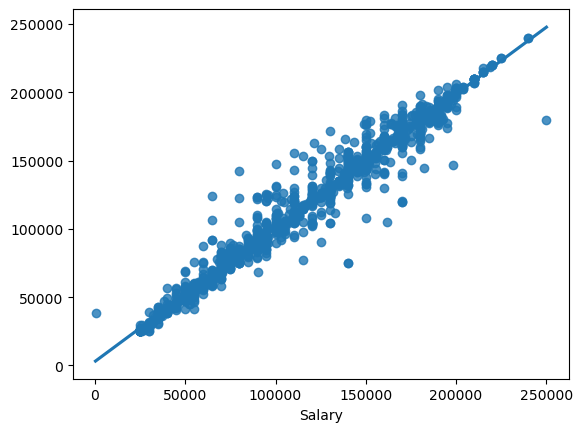

In [48]:
sb.regplot(y=predictions, x=Y_test);

# 9. Model Evaluation by User Input

### 9.1 User Input

In [49]:
sample_data  = [25,'Male','PhD','Junior Data Scientist',2,'Canada','Asian']

### 9.2 Preprocessing user input

In [50]:
sample_test_data = pd.DataFrame([sample_data],columns =['Age','Gender','Education Level','Job Title','Years of Experience','Country','Race'])
sample_test_encoded = encoder.transform(sample_test_data[['Gender','Job Title','Education Level','Country','Race']])
sample_test_encoded_df = pd.DataFrame(sample_test_encoded.toarray(),columns=encoder.get_feature_names_out(['Gender','Job Title','Education Level','Country','Race']))
sample_selected_columns_df = sample_test_data[['Age','Years of Experience']]
sample_test_df = pd.concat([sample_selected_columns_df,sample_test_encoded_df], axis=1)

In [51]:
sample_test_df

,Age,Years of Experience,Gender_Female,Gender_Male,Gender_Other,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,25,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 9.3 Feeding the input to trained model

In [52]:
sample_prediction = rfr.predict(sample_test_df)

In [53]:
print("The predicted salary for this individual is : ${:,.2f}".format(round(sample_prediction.item(),2)))

The predicted salary for this individual is : $73,692.88


# 10 Conclusions

### &#x1F680;From the EDA, we can bring out these conclusions : 

#### &#x1F449; As the Age increases, the salary falls into the higher side of spectrum #### 

#### &#x1F449; "Other" gender earns more than the Male & Female #### 

#### &#x1F449; PhD holders earn more than any other Education level followed by Master's#### 

#### &#x1F449; Surprisingly people with "other" gender holding Master's earn approx. equal to Males & Females holding PhD #### 

#### &#x1F449; CEO's , CTO's , CDO's, Director of Data Science & Director are the top 5 most earning professions #### 

#### &#x1F449; The top 4 most earning postions are dominated by Males while the Females make their entry as Director of Data science #### 

### &#x1F680;From the Trained Model, we can bring out these conclusions : 

#### &#x1F449; Mean Absolute Error (MAE) : 3742.95 #### 

#### &#x1F449; Root Mean Squared Error (RMSE) : 8103.38 #### 

#### &#x1F449; Distribution plot between the test data & predictions shows high co-relation #### 

#### &#x1F449; Testing with sample user data evaluates the preprocessing of encoder as well as the trained model's prediction capability #### 

# 11. Next Steps

#### &#x1F449; Creating a front end Web app using Flask or Streamlit framework #### 

#### &#x1F449; Deploying the Web App #### 

In [54]:
import pickle
pickle.dump(encoder,open('onehotlabelencoder.pkl','wb'))

In [55]:
pickle.dump(rfr , open('randomforestregressor.pkl','wb'))